## 实验二  神经网络
### 第1.1题  标准BP算法

In [1]:

#  Wine,数据预处理  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt 

#读数据
wine = np.genfromtxt("wine_data-2.csv", delimiter=",",skip_header=1)   #  二分类任务
X = wine[:,0:13]
y = wine[:,13]

sc= StandardScaler()
X_st=sc.fit_transform(X) # 对样本的各属性值进行准化

x_train, x_test, y_train, y_test = train_test_split(X_st, y)    # 默认取出97个样本作为测试集，33个作为测试集
# print(x_train.shape)


In [23]:
rate = 0.01    #学习率
# 以13个特征值作为输入，1个神经元作为输出（输出>=0.5为1类，<0.5为0类），中间隐藏层50个神经元
v = np.random.random((13, 100)) * 2 - 1
w = np.random.random((50, 3)) * 2 - 1

label_train = LabelBinarizer().fit_transform(y_train)
# print(label_train)
label_test = LabelBinarizer().fit_transform(y_test)
# print(label_test)

In [10]:
# 定义激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
#激活函数的导数
def d_sigmoid(x):
    return x * (1 - x)    

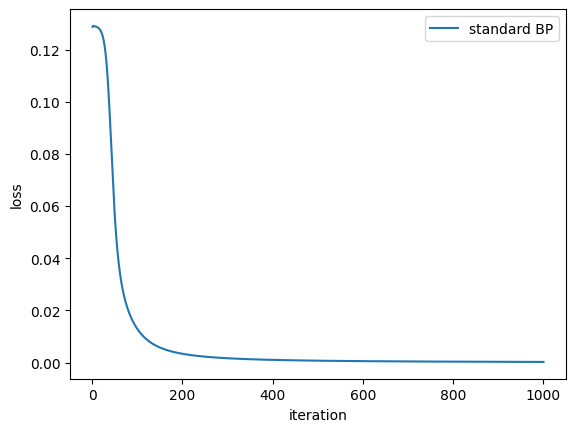

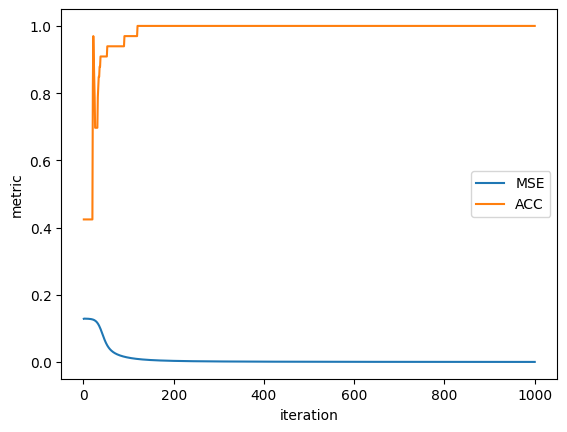

测试精度acc = 1.0
[[14  0]
 [ 0 19]]


In [74]:
# 训练
def train(x, y,outputs_dim=3,eta=0.05,max_iter=1000):#eta 才是学习率
#   outputs_dim  输出层神经元个数
    hiden_dim=50  # 隐层神经元个数
    
    #定义权重
    w1 = np.zeros((x.shape[1],hiden_dim))  #  （13，50）<--- 矩阵维数
    b1 = np.zeros((1,hiden_dim))  #  （1，50）
    w2 = np.zeros((hiden_dim,1))  #  （50，1）
    b2 = np.zeros((outputs_dim,1))  #  1 X 1
    
    losslist = []    #损失列表
    mse_list = []
    acc_list = []
    for ite in range(max_iter):
        loss_per_ite = []
        for m in range(x.shape[0]):   # 遍历样本
            xi,yi = x[m,:],y[m,:]

            xi,yi = xi.reshape(1,xi.shape[0]),yi.reshape(1,yi.shape[0])

            ##前向传播   
            u1 = np.dot(xi,w1)+b1    
            out1 = sigmoid(u1)    # 隐含层的输出  1 X 50
            
            u2 = np.dot(out1,w2)+b2   # (1,50) X (50，1) =（1,1）
            out2 = sigmoid(u2)    #输出(激活)层的输出,（1,1）
            
            loss = np.square(yi - out2)/2
            loss_per_ite.append(loss)
#             print("iter:",ite," loss:",loss)

            ##反向传播
            ##标准BP
            d_out2 = -(yi - out2)   # （1,1）         
            d_u2 = d_out2*d_sigmoid(out2)   #  gj ,（1,1） zhouzhihua   jqxx(机器学习)  P103  
            
            d_w2 = np.dot(np.transpose(out1),d_u2)  # delta(whj)，(50，1), np.transpose()--矩阵转置
            d_b2 = d_u2    # delta(thetaj),(1, 1)
            
            d_out1 = d_u2*w2 #  3E/3bh   zhouzhihua   jqxx(机器学习)  P103  (1,1) 点乘 (50，1) ---> (50,1)
            
            d_u1 = np.transpose(d_out1)*d_sigmoid(out1)    #  -eh    d_out1: (50, 1) , out1: 1 X 50 ，改成矩阵点乘            
            #  shapes (13,1) and (1,50) --->  (13 , 50)
            d_w1 = np.dot(np.transpose(xi),d_u1)   # delta(vih)        
            d_b1 = d_u1  # delta(rh)  (1 , 50) 
            ##更新权重
            w1 = w1 - eta*d_w1
            w2 = w2 - eta*d_w2
            b1 = b1 - eta*d_b1
            b2 = b2 - eta*d_b2   
        losslist.append(np.mean(loss_per_ite))
        # 在训练循环中，每轮结束后计算并记录当前的均方误差和准确率
        mse = np.mean(loss_per_ite) # 均方误差等于每个样本的损失平均值
        mse_list.append(mse) # 将均方误差添加到列表中
        test_label_list1 = []    #损失列表
        for m in range(x_test.shape[0]):
            xi,yi = x_test[m,:],label_test[m,:]
            xi,yi = xi.reshape(1,xi.shape[0]),yi.reshape(1,yi.shape[0])
            ##前向传播   
            u1 = np.dot(xi,w1)+b1
            out1 = sigmoid(u1)    # 隐含层的输出  1 X 50
            u2 = np.dot(out1,w2)+b2
            out2 = sigmoid(u2)    #激活层    
            if out2>=0.5:
                test_label_list1.append(1)
            else: 
                test_label_list1.append(0)
        re1=0  # 记录测试正确的样本数

        # 计算测试精度
        for i in range(len(y_test)):
            if test_label_list1[i]==y_test[i]:
                re1=re1+1
            else:
                pass
        acc = re1 / len(y_test) # 准确率等于正确分类的样本数除以总样本数
        acc_list.append(acc) # 将准确率添加到列表中
        
    ##Loss可视化，损失函数曲线
    plt.figure()
    plt.plot([i+1 for i in range(max_iter)],losslist)
    plt.legend(['standard BP'])
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.show()
    plt.figure()
    plt.plot([i + 1 for i in range(max_iter)], mse_list, label='MSE') # 绘制均方误差曲线，横轴为训练轮数，纵轴为均方误差，标签为'MSE'
    plt.plot([i + 1 for i in range(max_iter)], acc_list, label='ACC') # 绘制准确率曲线，横轴为训练轮数，纵轴为准确率，标签为'ACC'
    plt.legend() # 显示图例
    plt.xlabel('iteration') # 设置横轴标签为'iteration'
    plt.ylabel('metric') # 设置纵轴标签为'metric'
    plt.show() # 显示图像
    return w1,w2,b1,b2

######### 训练神经网络 #########
w1,w2,b1,b2 = train(x_train,label_train,1)    # 成功训练
test_label_list = []    #损失列表
for m in range(x_test.shape[0]):
    xi,yi = x_test[m,:],label_test[m,:]
    xi,yi = xi.reshape(1,xi.shape[0]),yi.reshape(1,yi.shape[0])
    ##前向传播   
    u1 = np.dot(xi,w1)+b1
    out1 = sigmoid(u1)    # 隐含层的输出  1 X 50
    u2 = np.dot(out1,w2)+b2
    out2 = sigmoid(u2)    #激活层    
    if out2>=0.5:
        test_label_list.append(1)
    else: 
        test_label_list.append(0)

re=0  # 记录测试正确的样本数

# 计算测试精度
for i in range(len(y_test)):
    if test_label_list[i]==y_test[i]:
        re=re+1
    else:
        pass

# 计算、输出测试精度
acc= re/len(y_test)
print("测试精度acc =",acc) 
# 导入confusion_matrix函数
from sklearn.metrics import confusion_matrix
# 计算混淆矩阵
cm = confusion_matrix(y_test, test_label_list)
# 打印混淆矩阵
print(cm)